In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'stress_testing_outliers'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'Folktables_Income_GA_2018'
EXPERIMENT_SESSION_UUID = '715ef4e8-fd23-4bd1-ad30-8fe69a7068d1'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P', 'RAC1P&AGEP']
PREPROCESSING_TECHNIQUES = ['No']

In [6]:
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
               'XGBClassifier', 'KNeighborsClassifier']

In [7]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [8]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(560, 29)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(300)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,AGEP_priv,RAC1P&AGEP_dis,RAC1P&AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P_dis,SEX&RAC1P_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,0,OK,2023-04-26 11:29:17.509,...,0.790143,0.808612,0.771712,0.813665,0.780236,0.834808,0.760784,0.816129,0.769159,0.791000
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,1,OK,2023-04-26 11:29:17.521,...,0.785374,0.806220,0.766749,0.810559,0.777286,0.828909,0.758170,0.811828,0.767290,0.788000
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,2,OK,2023-04-26 11:29:17.533,...,0.790143,0.811005,0.769231,0.816770,0.773599,0.837758,0.755556,0.811828,0.766355,0.787500
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,3,OK,2023-04-26 11:29:17.543,...,0.777424,0.806220,0.761787,0.805901,0.781711,0.817109,0.768627,0.805376,0.775701,0.789500
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,4,OK,2023-04-26 11:29:17.554,...,0.774245,0.806220,0.756824,0.805901,0.763274,0.817109,0.750327,0.793548,0.762617,0.777000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,Mean,301,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,1,OK,2023-04-26 11:44:08.389,...,0.591556,0.733868,0.559887,0.703440,0.606680,0.741001,0.541414,0.706193,0.583208,0.639965
1472,Mean,301,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,2,OK,2023-04-26 11:44:08.400,...,0.592485,0.732157,0.558600,0.703904,0.602081,0.743907,0.538576,0.702926,0.580702,0.637108
1473,Mean,301,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,3,OK,2023-04-26 11:44:08.411,...,0.588754,0.723949,0.554589,0.697386,0.600833,0.736348,0.539233,0.697910,0.579316,0.634047
1474,Mean,301,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,4,OK,2023-04-26 11:44:08.421,...,0.582791,0.719122,0.550440,0.691129,0.595334,0.730824,0.534442,0.691847,0.573816,0.628287


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [12]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [13]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [14]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.5]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.776805
1,Entropy,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.309411
2,F1,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.674468
3,FNR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.313853
4,FPR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,AGEP_dis,0.177118
...,...,...,...,...,...,...,...,...
171,Positive-Rate,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,1.050143
172,Selection-Rate,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.366500
173,Std,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.164988
174,TNR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.817204


In [15]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.5].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,SEX,-0.066006
1,Equalized_Odds_FPR,DecisionTreeClassifier,SEX,-0.064891
2,Equalized_Odds_FNR,DecisionTreeClassifier,SEX,0.066006
3,Disparate_Impact,DecisionTreeClassifier,SEX,1.005028
4,Statistical_Parity_Difference,DecisionTreeClassifier,SEX,0.005270
5,Accuracy_Parity,DecisionTreeClassifier,SEX,0.034298
6,Label_Stability_Ratio,DecisionTreeClassifier,SEX,1.063127
7,IQR_Parity,DecisionTreeClassifier,SEX,-0.027427
8,Std_Parity,DecisionTreeClassifier,SEX,-0.016657
9,Std_Ratio,DecisionTreeClassifier,SEX,0.903567


### Subgroup metrics per dataset, experiment iteration, and model

In [16]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [17]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [18]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [19]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [16]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [21]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Label_Stability',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [22]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [23]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Accuracy',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [24]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [15]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_fairness_metrics_lst[3],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [26]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

In [1]:
# visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
#                                                                    target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
#                                                                    subgroup_metrics_type='variance')

In [2]:
# visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
#                                                                    target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
#                                                                    subgroup_metrics_type='error')

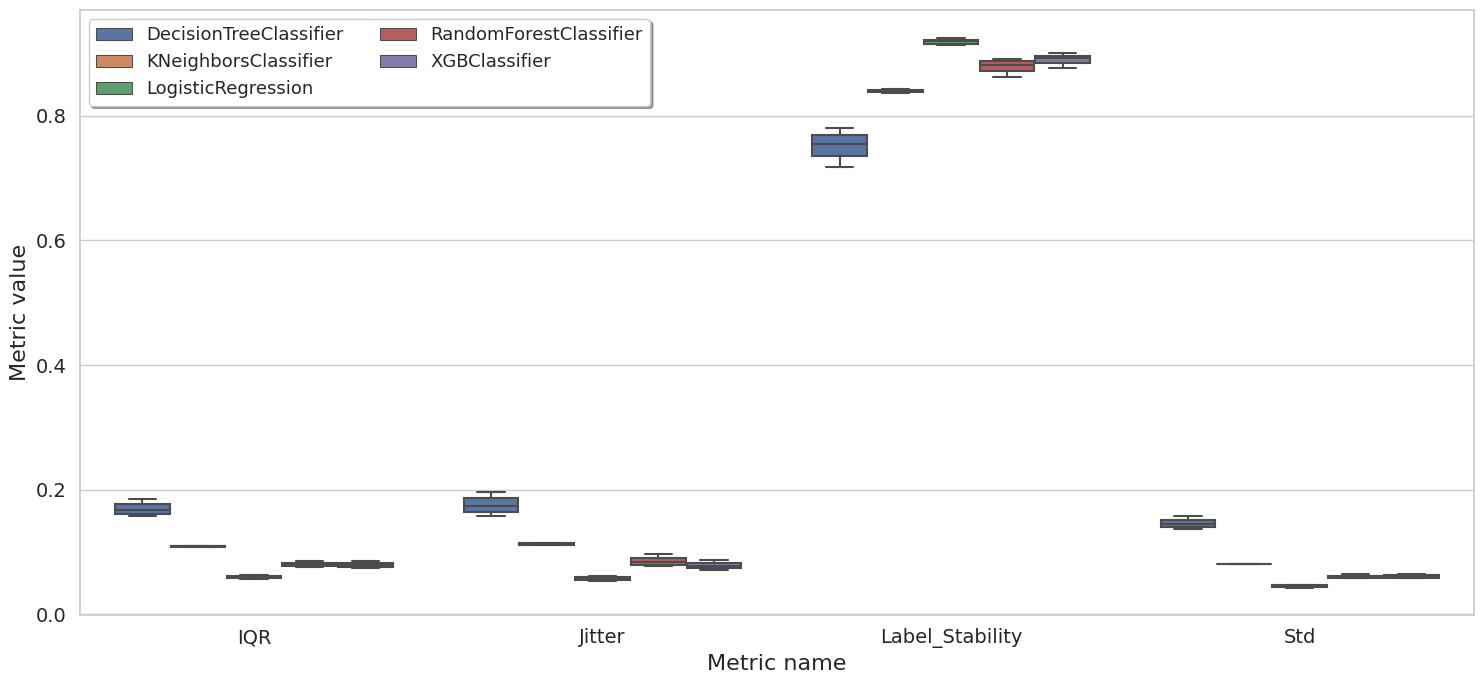

In [29]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

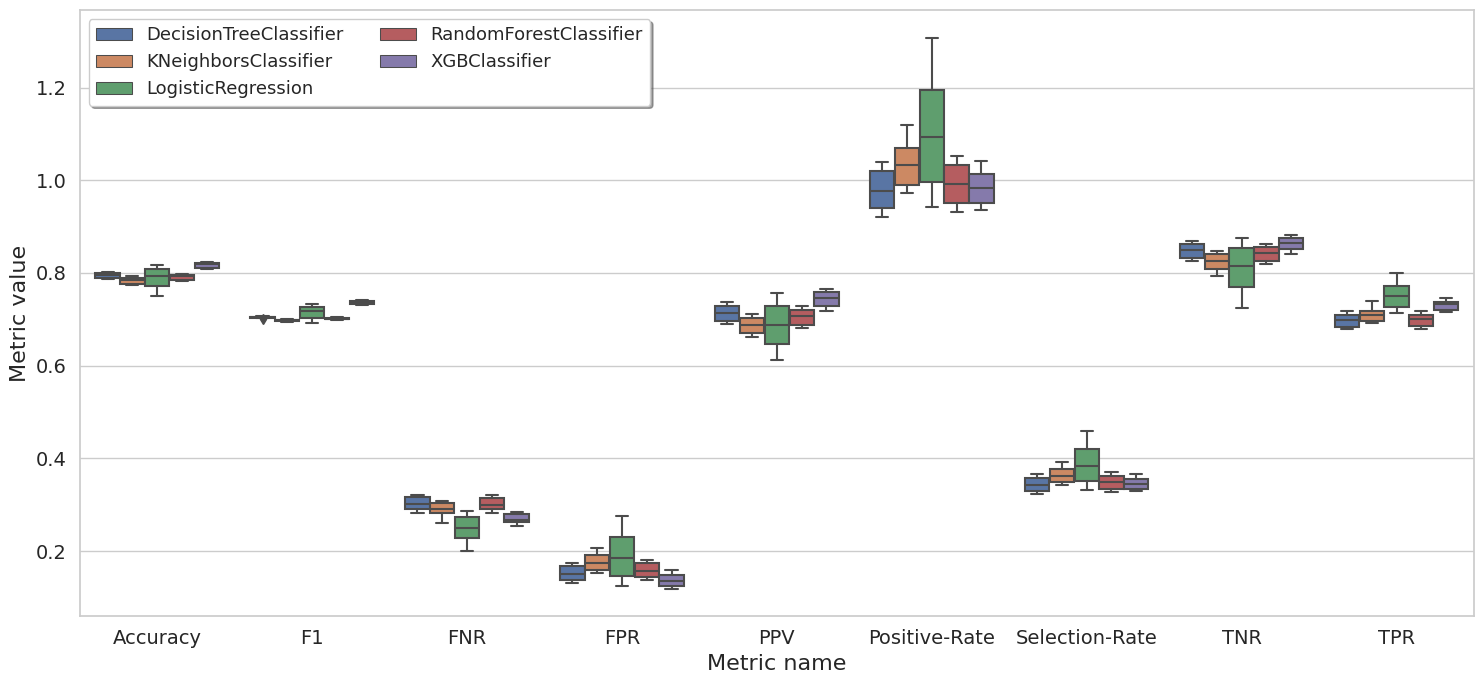

In [30]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

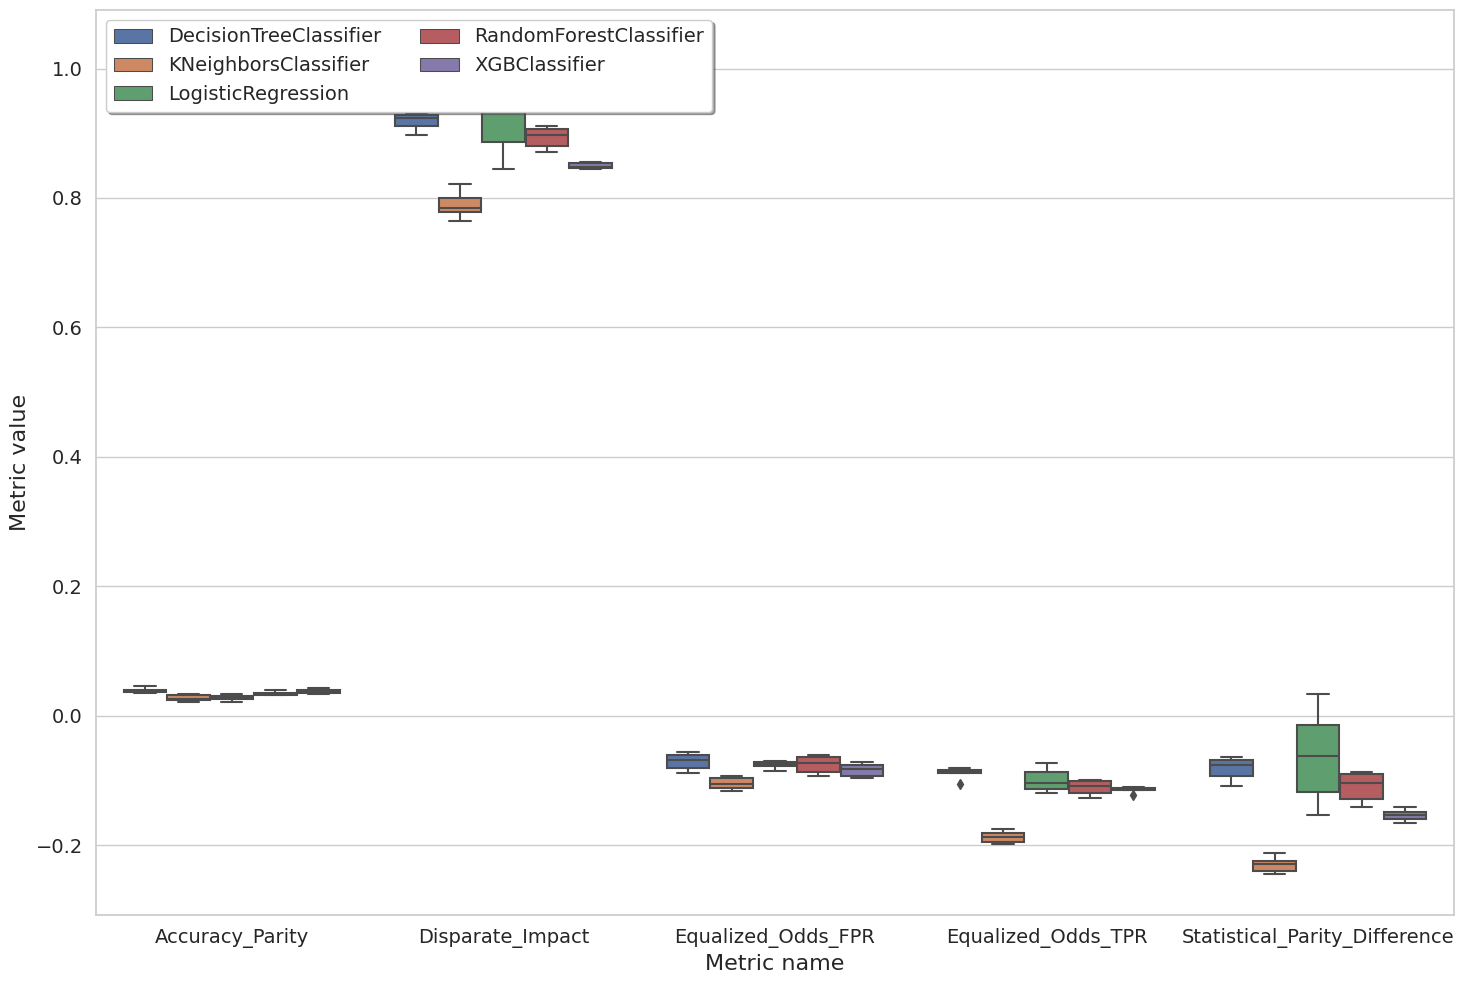

In [31]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='RAC1P',
                                                                  group_metrics_type='fairness')

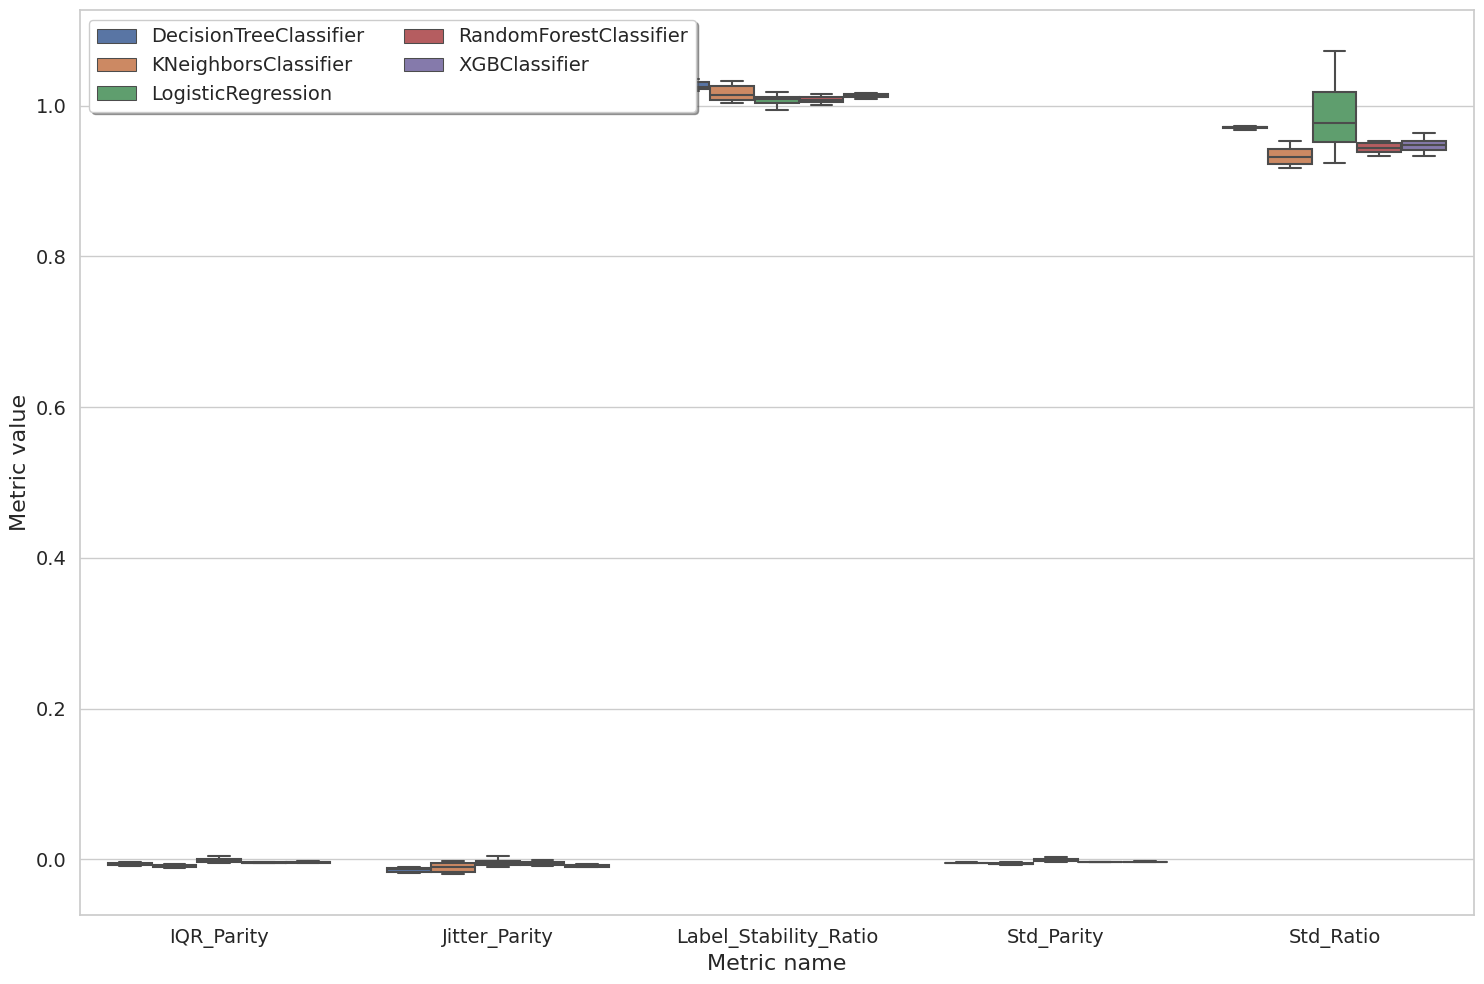

In [32]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='RAC1P',
                                                                  group_metrics_type='variance')

### One box plot for both error and variance metrics for subgroups

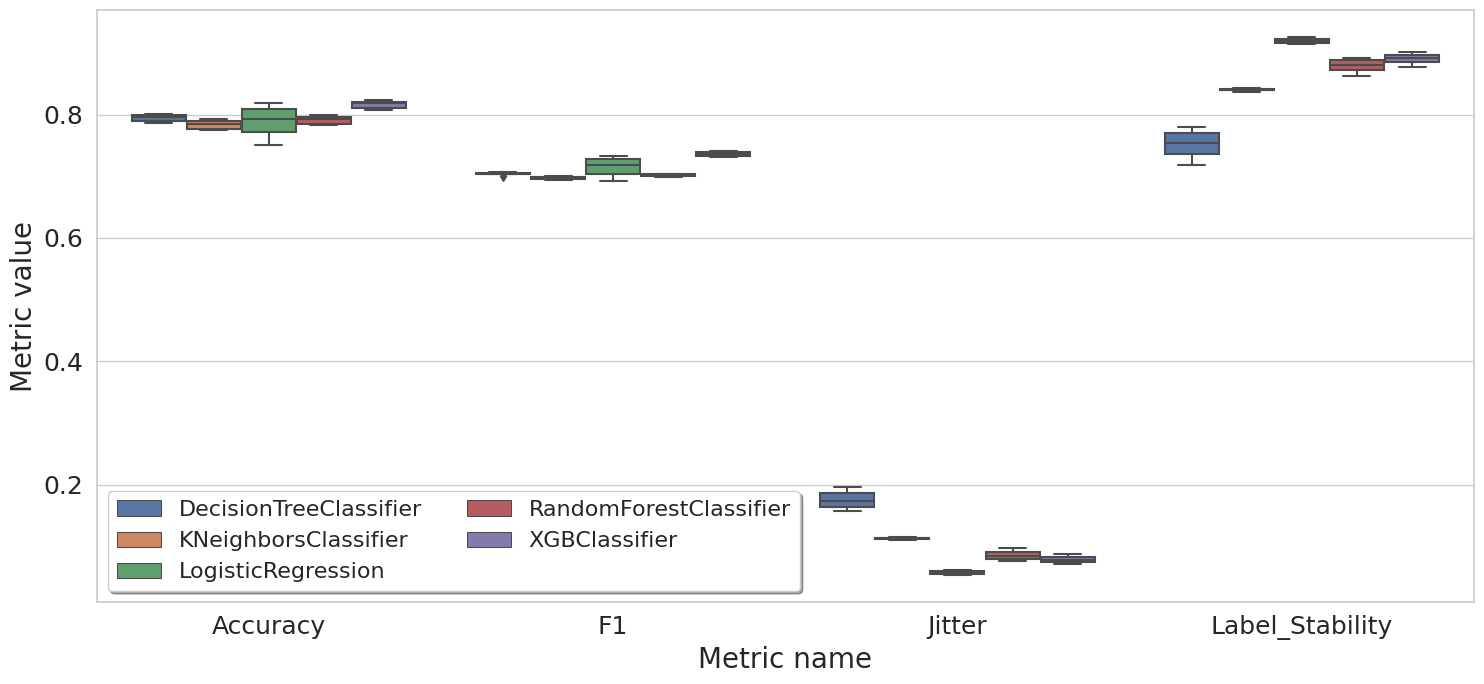

In [17]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'],
                                                                     legend_loc='lower left')

In [36]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name='LogisticRegression',
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics=['Accuracy', 'F1', 'Jitter', 'Label_Stability'])

alt.VConcatChart(...)

In [20]:
# Model names: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, XGBClassifier, KNeighborsClassifier
visualizer.create_subgroups_grid_pct_lines_plot(model_name='KNeighborsClassifier',
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics=['Accuracy', 'F1', 'Jitter', 'Label_Stability'])

alt.VConcatChart(...)

In [16]:
# Model names: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, XGBClassifier, KNeighborsClassifier
visualizer.create_grid_for_metrics_comparison(model_name='KNeighborsClassifier',
                                              target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                              subgroup_metrics=['Jitter', 'Accuracy'],
                                              group_metrics=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                              mode='rows_pct')

alt.VConcatChart(...)